In [1]:
#importação de bibliotecas e definição de estilo dos gráficos

import pandas as pd
from pathlib import Path
import glob, os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

#estilo 

style.use('ggplot')
plt.rcParams['figure.figsize'] = (20,10)

In [2]:
# Lendo dados sobre candidatos de São Thome das Letras apenas com a colunas para análises

df = pd.read_csv('C:/Users/Mayra/Documents/Faculdade/data-analysis-eleicoes/dados_cand_2020/consulta_cand_2020_MG_STL.csv', 
                        encoding='latin-1', index_col=None, low_memory=False, error_bad_lines=False, sep=';', quotechar='"', 
                     usecols=['NM_UE','DS_CARGO','SQ_CANDIDATO','NM_CANDIDATO','NM_URNA_CANDIDATO', 'SG_PARTIDO',
                              'NR_IDADE_DATA_POSSE','DS_GENERO', 'DS_GRAU_INSTRUCAO','DS_COR_RACA','DS_OCUPACAO',
                              'VR_DESPESA_MAX_CAMPANHA'])

In [3]:
# Verificando quantas linhas foram lidas
df.index

RangeIndex(start=0, stop=63, step=1)

In [4]:
# Verificando o número de candidatos únicos
df['SQ_CANDIDATO'].nunique()

63

In [5]:
# Verificando valores nulos
df.isnull().sum()

NM_UE                      0
DS_CARGO                   0
SQ_CANDIDATO               0
NM_CANDIDATO               0
NM_URNA_CANDIDATO          0
SG_PARTIDO                 0
NR_IDADE_DATA_POSSE        0
DS_GENERO                  0
DS_GRAU_INSTRUCAO          0
DS_COR_RACA                0
DS_OCUPACAO                0
VR_DESPESA_MAX_CAMPANHA    0
dtype: int64

In [6]:
df.head(3).T

,0,1,2
NM_UE,SÃO THOMÉ DAS LETRAS,SÃO THOMÉ DAS LETRAS,SÃO THOMÉ DAS LETRAS
DS_CARGO,VEREADOR,VEREADOR,VICE-PREFEITO
SQ_CANDIDATO,130000780839,130000780841,130000953264
NM_CANDIDATO,PAULO SÉRGIO NOGUEIRA,EMERSON SILVA PEREIRA,JOAQUIM DE JESUS PEREIRA
NM_URNA_CANDIDATO,SERGINHO ZOINHO,CHICLETINHO 15150,QUINZINHO PEREIRA
SG_PARTIDO,MDB,MDB,MDB
NR_IDADE_DATA_POSSE,42,22,63
DS_GENERO,MASCULINO,MASCULINO,MASCULINO
DS_GRAU_INSTRUCAO,ENSINO MÉDIO COMPLETO,ENSINO FUNDAMENTAL INCOMPLETO,ENSINO FUNDAMENTAL INCOMPLETO
DS_COR_RACA,PRETA,BRANCA,PARDA


In [7]:
# Elimando as linhas duplicadas
df.drop_duplicates(keep='last', inplace=True)

In [9]:
# Lendo e juntando com o csv dos bens dos candidatos - disponível em https://bit.ly/3lnh6Ge

bens_cand = pd.read_csv('C:/Users/Mayra/Documents/Faculdade/data-analysis-eleicoes/dados_cand_2020/bem_candidato_2020_BRASIL.csv', 
                        encoding='latin-1', index_col=None, low_memory=False, error_bad_lines=False, decimal=',',
                        sep=';', quotechar='"', usecols=['SG_UF', 'SG_UE','SQ_CANDIDATO','DS_BEM_CANDIDATO','VR_BEM_CANDIDATO'])

In [10]:
bens_cand.head()

,SG_UF,SG_UE,SQ_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO
0,GO,96059,90000791563,UM LOTE DE TERRENO LOCALIZADO AV MINAS GERAIS ...,5000.0
1,PR,74446,160000996056,LOCALIZADO NA RUA ANTONIO SIQUEIRA VIDAL,700000.0
2,CE,15873,60000979523,BANCO DO BRASIL,3000.0
3,BA,35696,50000792280,"2,5 HECTARES FAZENDA CAPÃO",30000.0
4,RS,85413,210000783855,TERRENO,550000.0


In [11]:
bens_cand.columns = ['CODIGO_TSE' if x=='SG_UE' else x for x in bens_cand.columns] 

In [12]:
bens_cand.isnull().sum()

SG_UF               0
CODIGO_TSE          0
SQ_CANDIDATO        0
DS_BEM_CANDIDATO    0
VR_BEM_CANDIDATO    0
dtype: int64

In [13]:
# Somando o total de bens por candidato 
df_bens = pd.pivot_table(bens_cand,index=['SQ_CANDIDATO'],aggfunc={'VR_BEM_CANDIDATO':np.sum})
df_bens

,VR_BEM_CANDIDATO
SQ_CANDIDATO,
10000641345,319500.00
10000641349,179000.00
10000641351,7000.00
10000641352,150000.00
10000641353,150000.00
...,...
270001267882,110000.00
270001267915,20000.00
270001267986,12200.00


In [14]:
# Juntando as informações e criando a planilha final
candidatos = df.merge(df_bens, on='SQ_CANDIDATO', how='left')
candidatos.head(3).T

,0,1,2
NM_UE,SÃO THOMÉ DAS LETRAS,SÃO THOMÉ DAS LETRAS,SÃO THOMÉ DAS LETRAS
DS_CARGO,VEREADOR,VEREADOR,VICE-PREFEITO
SQ_CANDIDATO,130000780839,130000780841,130000953264
NM_CANDIDATO,PAULO SÉRGIO NOGUEIRA,EMERSON SILVA PEREIRA,JOAQUIM DE JESUS PEREIRA
NM_URNA_CANDIDATO,SERGINHO ZOINHO,CHICLETINHO 15150,QUINZINHO PEREIRA
SG_PARTIDO,MDB,MDB,MDB
NR_IDADE_DATA_POSSE,42,22,63
DS_GENERO,MASCULINO,MASCULINO,MASCULINO
DS_GRAU_INSTRUCAO,ENSINO MÉDIO COMPLETO,ENSINO FUNDAMENTAL INCOMPLETO,ENSINO FUNDAMENTAL INCOMPLETO
DS_COR_RACA,PRETA,BRANCA,PARDA


In [15]:
candidatos.isnull().sum()

NM_UE                       0
DS_CARGO                    0
SQ_CANDIDATO                0
NM_CANDIDATO                0
NM_URNA_CANDIDATO           0
SG_PARTIDO                  0
NR_IDADE_DATA_POSSE         0
DS_GENERO                   0
DS_GRAU_INSTRUCAO           0
DS_COR_RACA                 0
DS_OCUPACAO                 0
VR_DESPESA_MAX_CAMPANHA     0
VR_BEM_CANDIDATO           16
dtype: int64

In [16]:
candidatos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 0 to 62
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NM_UE                    63 non-null     object 
 1   DS_CARGO                 63 non-null     object 
 2   SQ_CANDIDATO             63 non-null     int64  
 3   NM_CANDIDATO             63 non-null     object 
 4   NM_URNA_CANDIDATO        63 non-null     object 
 5   SG_PARTIDO               63 non-null     object 
 6   NR_IDADE_DATA_POSSE      63 non-null     int64  
 7   DS_GENERO                63 non-null     object 
 8   DS_GRAU_INSTRUCAO        63 non-null     object 
 9   DS_COR_RACA              63 non-null     object 
 10  DS_OCUPACAO              63 non-null     object 
 11  VR_DESPESA_MAX_CAMPANHA  63 non-null     int64  
 12  VR_BEM_CANDIDATO         47 non-null     float64
dtypes: float64(1), int64(3), object(9)
memory usage: 6.9+ KB


In [17]:
# Confirmando se o número de candidatos continua o mesmo
candidatos['SQ_CANDIDATO'].nunique()

63

In [18]:
# Filtrando os candidatos por gênero
candidatos.groupby(by='DS_GENERO').size()

DS_GENERO
FEMININO     19
MASCULINO    44
dtype: int64

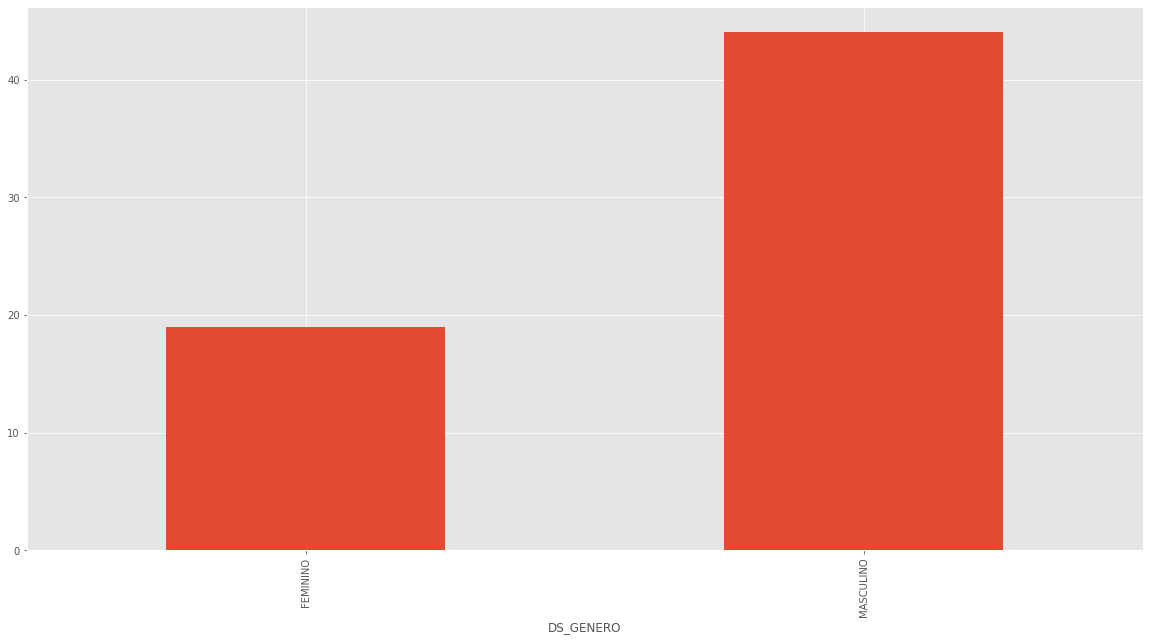

In [19]:
# Visualização em barras por gênero
genero = df.groupby(by='DS_GENERO').size()
genero.plot(kind ='bar')
plt.show()